# Spam dataset with ensemble methods

In [8]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [35]:
spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,1,3,6,7,8,9],
    'Sale':[1,2,3,3,6,7,9,10,5,8,4,6],
    'Spam': ['no','no','no','no','no','no','yes','yes','yes','yes','yes','yes']})
spam_dataset

,Lottery,Sale,Spam
0,7,1,no
1,3,2,no
2,9,3,no
3,1,3,no
4,2,6,no
5,4,7,no
6,1,9,yes
7,3,10,yes
8,6,5,yes
9,7,8,yes


In [37]:
X = spam_dataset[['Lottery', 'Sale']]
y = spam_dataset['Spam']
spam_decision_tree = DecisionTreeClassifier()
spam_decision_tree.fit(X,y)
spam_decision_tree.score(X,y)

1.0

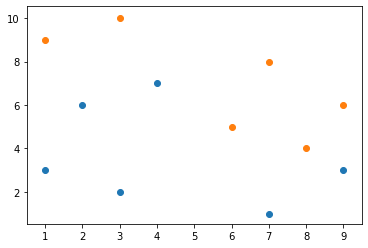

In [42]:
from matplotlib import pyplot as plt
plt.scatter(X['Lottery'][:6], X['Sale'][:6])
plt.scatter(X['Lottery'][6:], X['Sale'][6:])

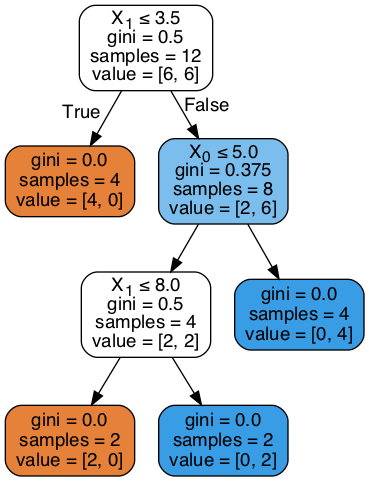

In [39]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(spam_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Now with a slightly modified dataset

In [40]:
new_spam_dataset = pd.DataFrame({
    'Lottery':[7,3,9,1,2,4,8,1,3,6,7,8,9,2],
    'Sale':[1,2,3,3,6,7,6,9,10,5,8,4,6,2],
    'Spam': ['no','no','no','no','no','no','no','yes','yes','yes','yes','yes','yes','yes']})
new_spam_dataset

,Lottery,Sale,Spam
0,7,1,no
1,3,2,no
2,9,3,no
3,1,3,no
4,2,6,no
5,4,7,no
6,8,6,no
7,1,9,yes
8,3,10,yes
9,6,5,yes


In [41]:
new_X = new_spam_dataset[['Lottery', 'Sale']]
new_y = new_spam_dataset['Spam']
spam_decision_tree = DecisionTreeClassifier()
spam_decision_tree.fit(new_X,new_y)
spam_decision_tree.score(new_X,new_y)

1.0

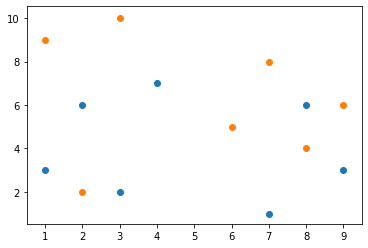

In [44]:
plt.scatter(new_X['Lottery'][:7], new_X['Sale'][:7])
plt.scatter(new_X['Lottery'][7:], new_X['Sale'][7:])

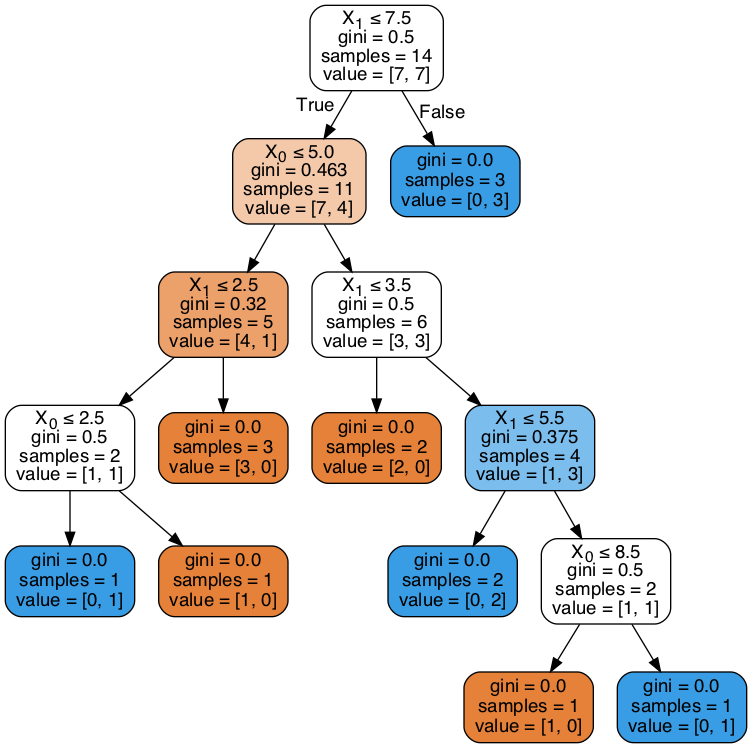

In [45]:
dot_data = StringIO()
export_graphviz(spam_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())